# IXPLORE demo

This notebook demonstrates a compact workflow for using IXPLORE.

- Load example reaction data (binary or Likert-scale).
- Initialize and fit `IXPLORE` (with and without PCA initialization).
- Visualize the learned 2D embedding and decision boundaries for ssome questions.
- Embed a new user from partial answers and impute missing responses interpretably.
- Evaluate fit (MAE, accuracy) and examine model parameters.

Required packages: `numpy`, `pandas`, `scikit-learn`, `scipy`, `matplotlib`, and the local `ixplore` package (install with `pip install -e .`).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ixplore import IXPLORE
from ixplore.visualization import plot_overview, plot_posterior
from ixplore.utils import transformation_matrix

### Load data

This cell loads user metadata (for example colours or labels) used to annotate plots. Synthetic data was generated in notebooks/simulation.ipynb.

In [2]:
users = pd.read_csv('../data/synthetic_users.csv', index_col=0)
users

x      y  party color
id                            
0   -0.468 -0.583      0    C0
1   -0.244 -0.432      0    C0
2   -0.346 -0.412      0    C0
3   -0.514 -0.558      0    C0
4   -0.419 -0.586      0    C0
..     ...    ...    ...   ...
245 -0.154  0.210      4    C4
246  0.012 -0.171      4    C4
247 -0.079 -0.067      4    C4
248 -0.203  0.279      4    C4
249  0.270  0.024      4    C4

[250 rows x 4 columns]

This cell loads the user-item reaction matrix. For Likert data, IXPLORE automatically normalizes responses to the [0,1] range.

In [3]:
reactions = pd.read_csv('../data/likert_reactions.csv', index_col=0)
reactions

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q31  Q32  Q33  Q34  Q35  \
id                                            ...                            
0     1   0   3   3   1   0   3   0   0    0  ...    0    1    3    0    0   
1     2   0   3   3   1   0   3   1   0    0  ...    0    1    3    0    0   
2     1   0   3   3   1   0   3   0   0    0  ...    1    1    3    0    0   
3     1   0   3   3   1   0   3   0   0    0  ...    0    1    3    0    0   
4     1   0   3   3   1   0   3   0   0    0  ...    0    1    3    0    0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
245   1   0   3   2   2   1   3   2   1    0  ...    2    3    1    0    1   
246   2   0   3   2   1   0   3   2   0    0  ...    1    2    2    0    0   
247   2   0   3   2   2   0   3   2   0    0  ...    1    2    2    0    0   
248   1   0   3   1   2   1   3   2   1    0  ...    2    3    1    0    1   
249   2   0   3   2   1   0   3   3   1    0  ...    1    3    2    0    1   

     Q36  Q37  Q38  Q39  Q40  
id                            
0      1    1    0    3    1  
1      1    1    1    2    2  
2      1    1    1    2    2  
3      1    1    0    3    1  
4      1    1    0    3    1  
..   ...  ...  ...  ...  ...  
245    1    0    3    2    3  
246    1    0    3    1    3  
247    1    0    3    2    3  
248    0    0    3    2    3  
249    1    0    3    1    3  

[250 rows x 40 columns]

## Train models

### Random initialization

In [4]:
xplore = IXPLORE(reactions, pca_initialization=False, random_state=17)


2026-02-14 12:45:56,779 - ixplore - INFO - Number of users for model: 250
2026-02-14 12:45:56,779 - ixplore - INFO - Number of items: 40
2026-02-14 12:45:56,780 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 12:45:56,781 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 12:45:56,784 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 12:45:56,784 - ixplore - INFO - Random state set to 17
2026-02-14 12:45:56,785 - ixplore - INFO - Initialized embedding with random values.
2026-02-14 12:45:56,840 - ixplore - INFO - Fitted model parameters from embedding.


We initialize the user positions randomly (left panel) and learn logistic regression models based on these positions (righ panel).

2026-02-14 12:45:56,913 - ixplore - INFO - MAE: 0.27088162478176414, ACC: 0.7045


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

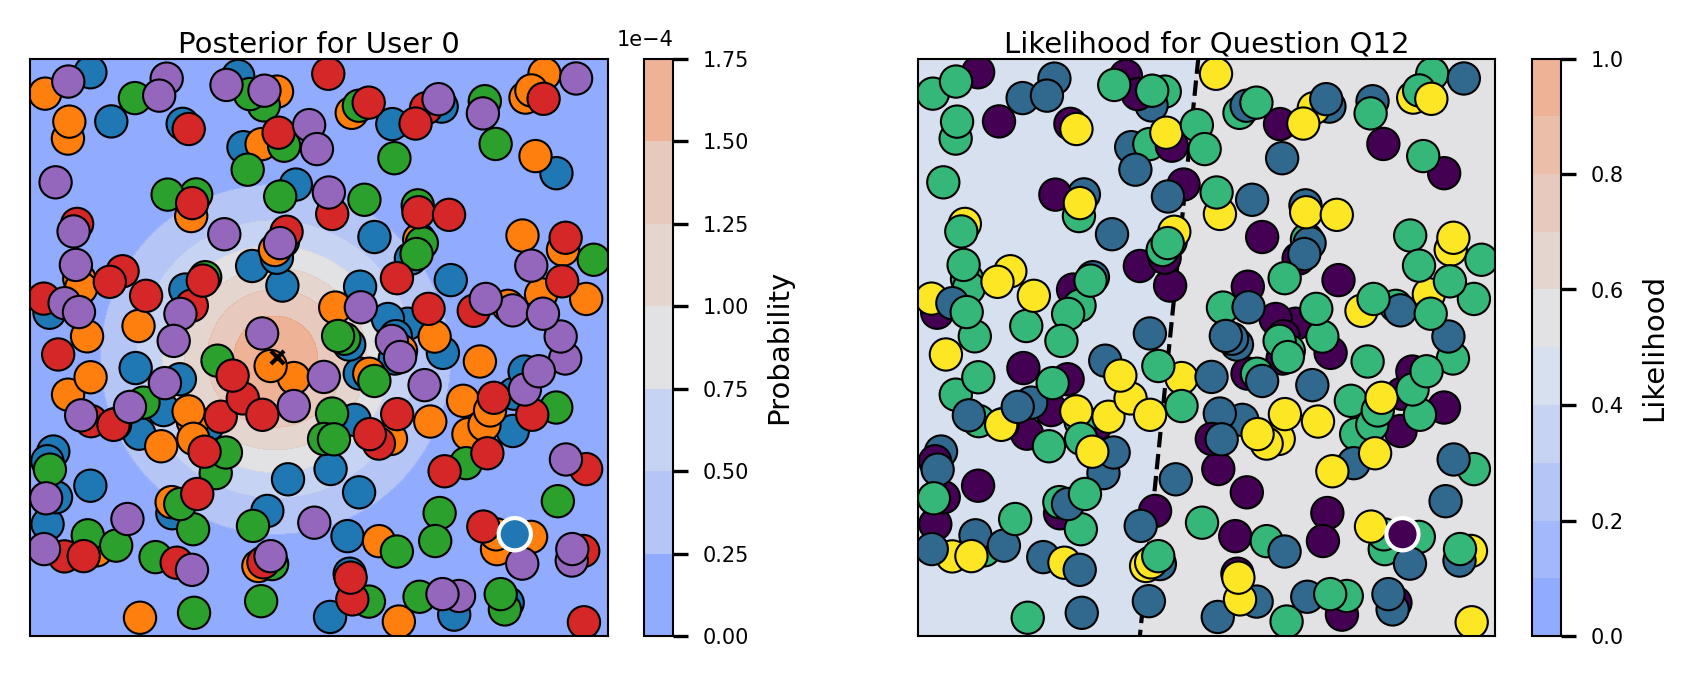

In [5]:
plot_overview(xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

We fit posterior distributions for all users using the current logistic regression models, then visualize the posterior for one example user.

2026-02-14 12:45:58,326 - ixplore - INFO - MAE: 0.2685002496404565, ACC: 0.7189


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

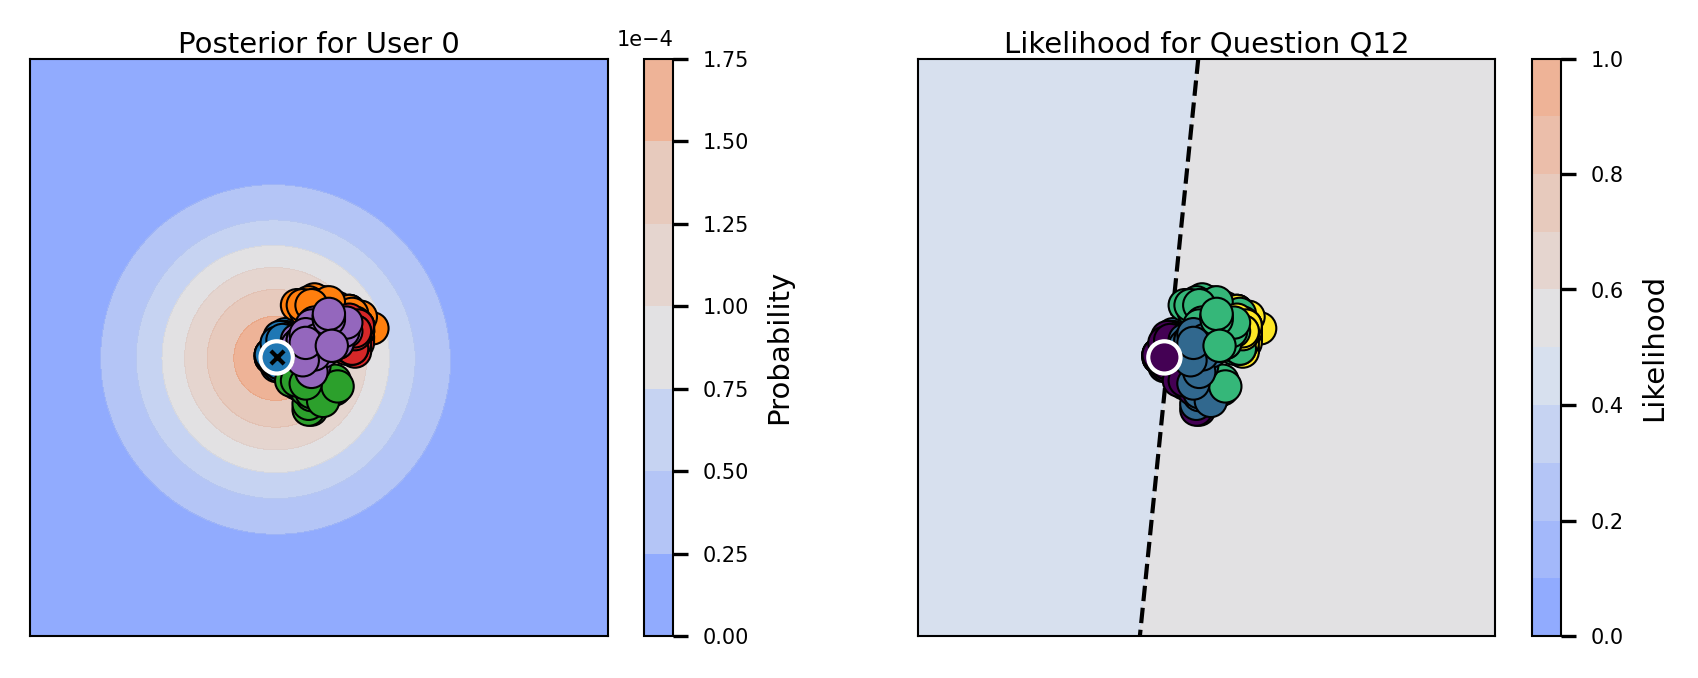

In [6]:
xplore.fit_posteriors()
plot_overview(xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

We center and scale the embedding so points fit within the defined plotting limits, then re-plot the overview.

2026-02-14 12:45:58,556 - ixplore - INFO - MAE: 0.2585436923749154, ACC: 0.7417


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

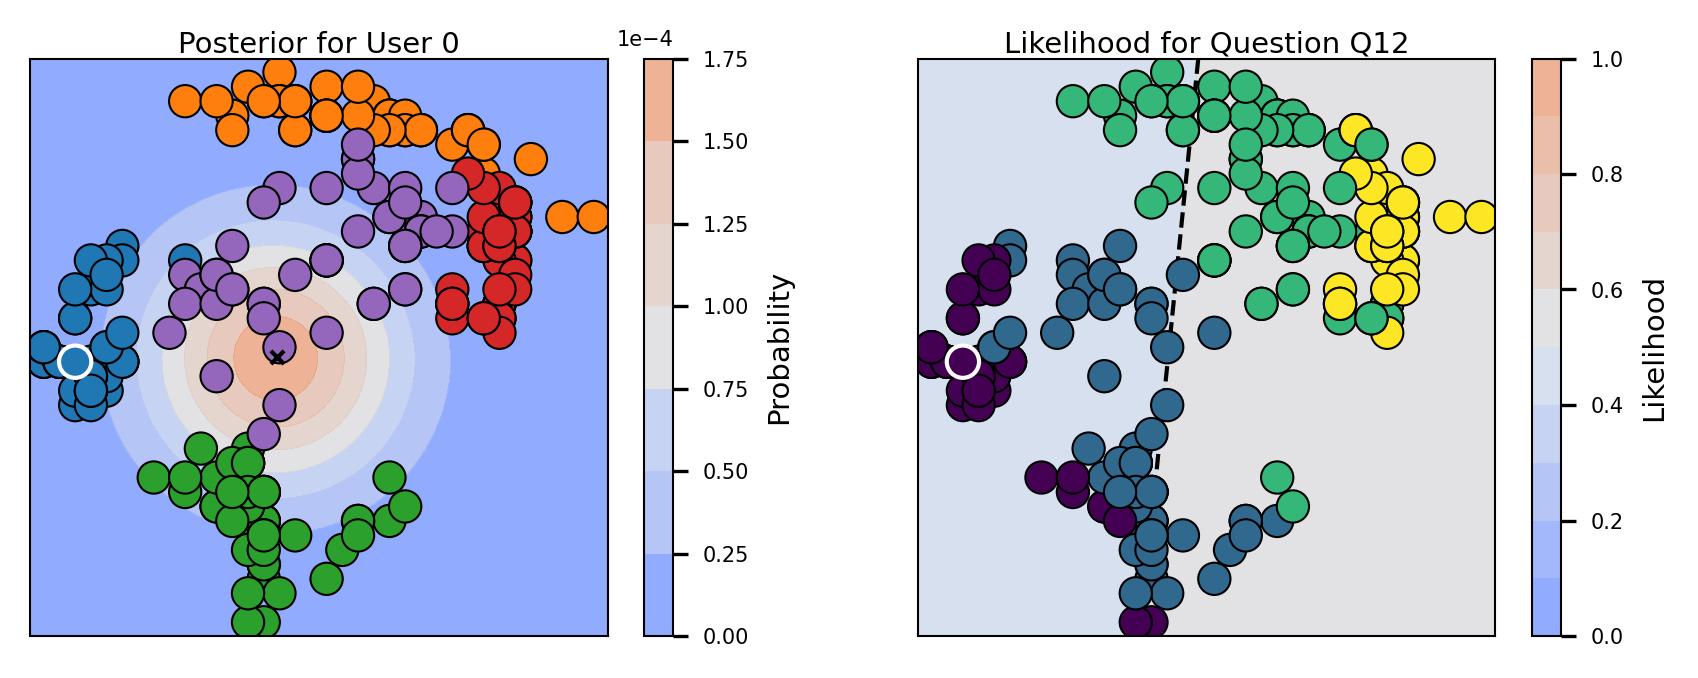

In [7]:
xplore.normalize_embedding()
plot_overview(xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

We fit logistic regression models for each question using the current embedding as features. The decisions boundaries start to be meaningful (right panel). The new posterior distribution of the inspected user got slightly modifed (left panel).

2026-02-14 12:45:58,813 - ixplore - INFO - MAE: 0.10071268692733133, ACC: 0.9389


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

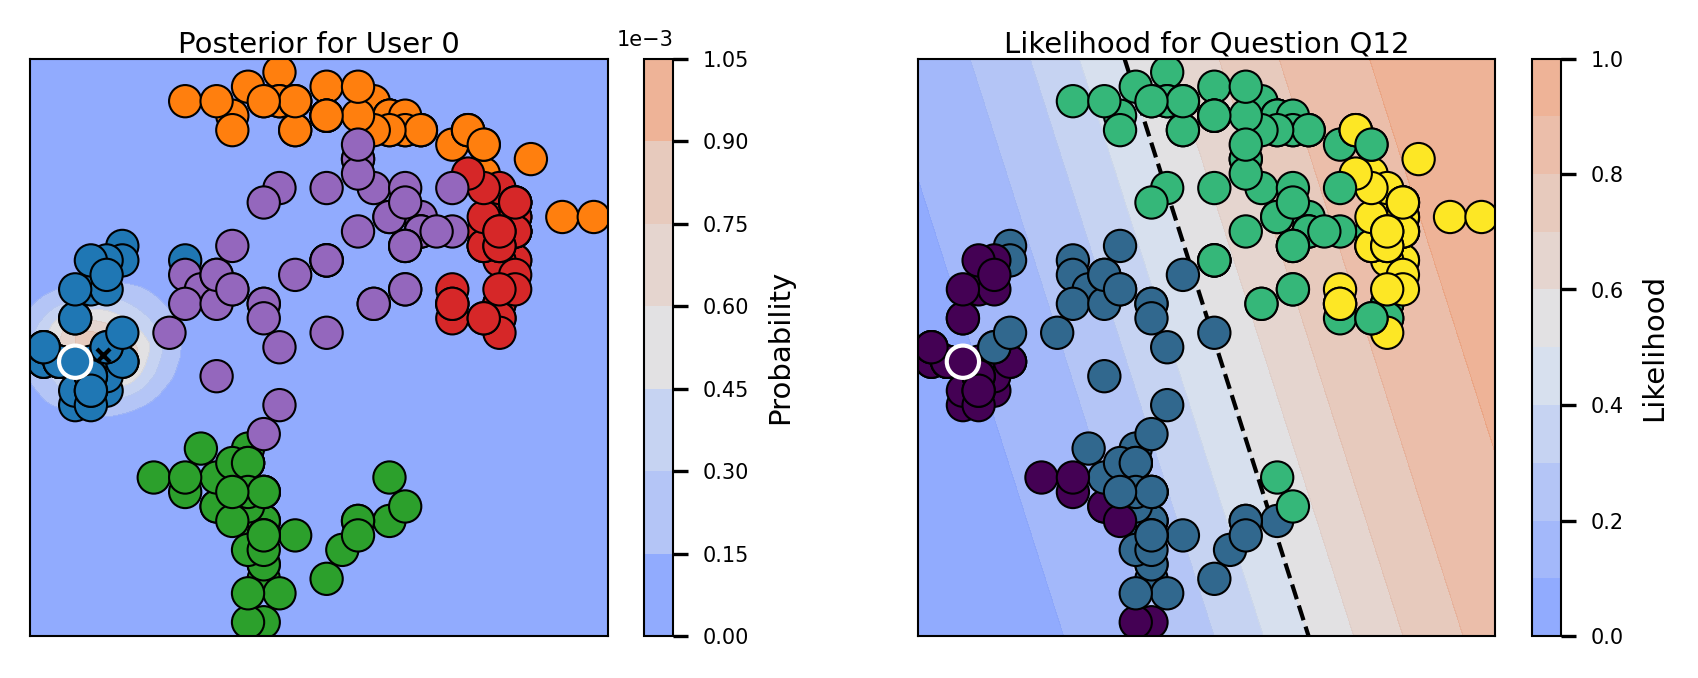

In [8]:
xplore.fit_models()
plot_overview(xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

We repeat these three steps for another four iterations and see how the mean absolute error goes down.

2026-02-14 12:45:58,964 - ixplore - INFO - Iteration 1/4
2026-02-14 12:46:00,230 - ixplore - INFO - Fit MAE: 0.0796, Fit accuracy: 0.9720
2026-02-14 12:46:00,231 - ixplore - INFO - Iteration 2/4
2026-02-14 12:46:01,547 - ixplore - INFO - Fit MAE: 0.0817, Fit accuracy: 0.9641
2026-02-14 12:46:01,548 - ixplore - INFO - Iteration 3/4
2026-02-14 12:46:02,798 - ixplore - INFO - Fit MAE: 0.0814, Fit accuracy: 0.9648
2026-02-14 12:46:02,799 - ixplore - INFO - Iteration 4/4
2026-02-14 12:46:04,107 - ixplore - INFO - Fit MAE: 0.0796, Fit accuracy: 0.9716
2026-02-14 12:46:04,183 - ixplore - INFO - MAE: 0.07959247810078417, ACC: 0.9716


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

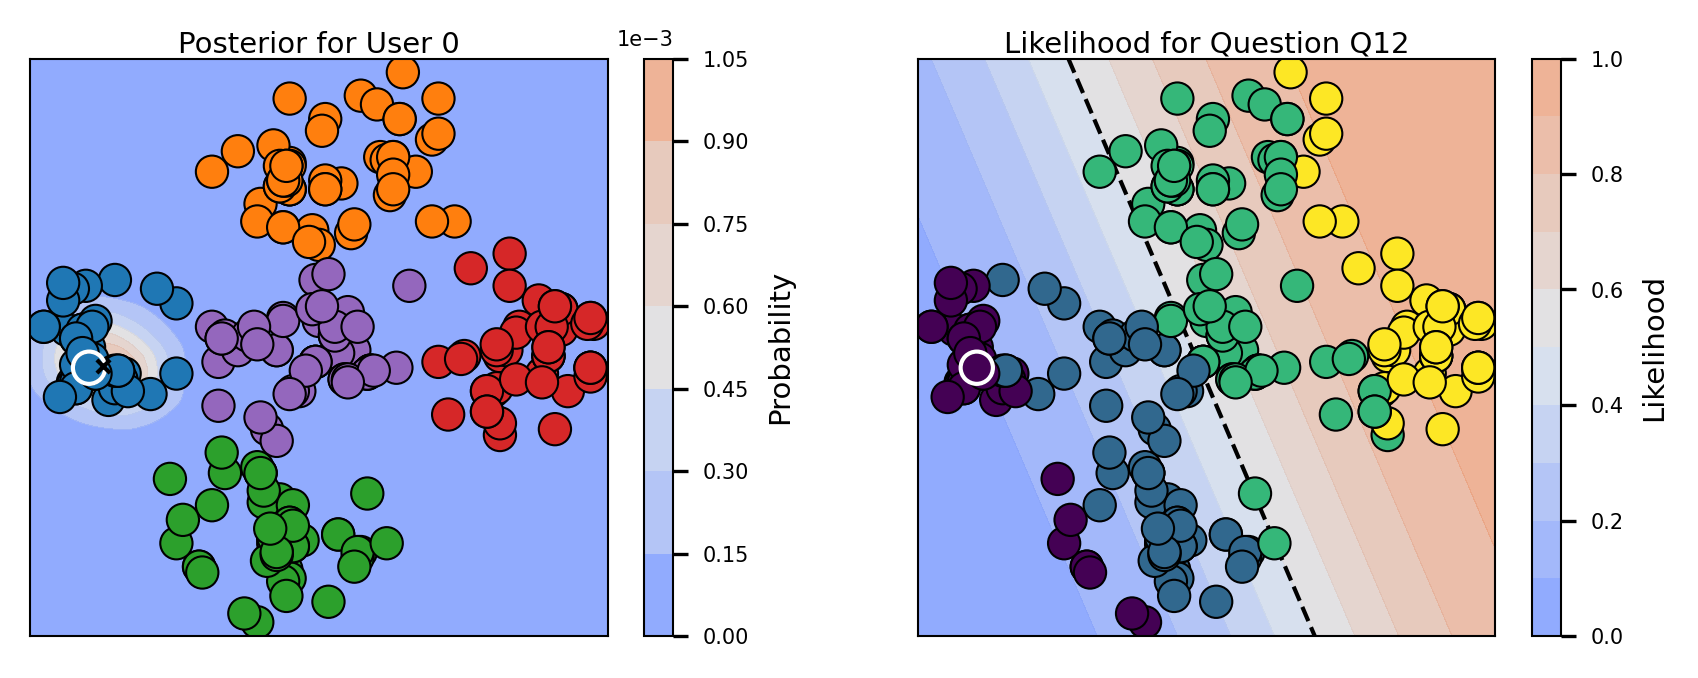

In [9]:
xplore.iterate(n_iterations=4)
plot_overview(xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

We apply a linear transformation (rotation/shear/scale) to the embedding to align with typical dimensions in political landscapes.

2026-02-14 12:46:04,461 - ixplore - INFO - MAE: 0.07519133890893573, ACC: 0.9701


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

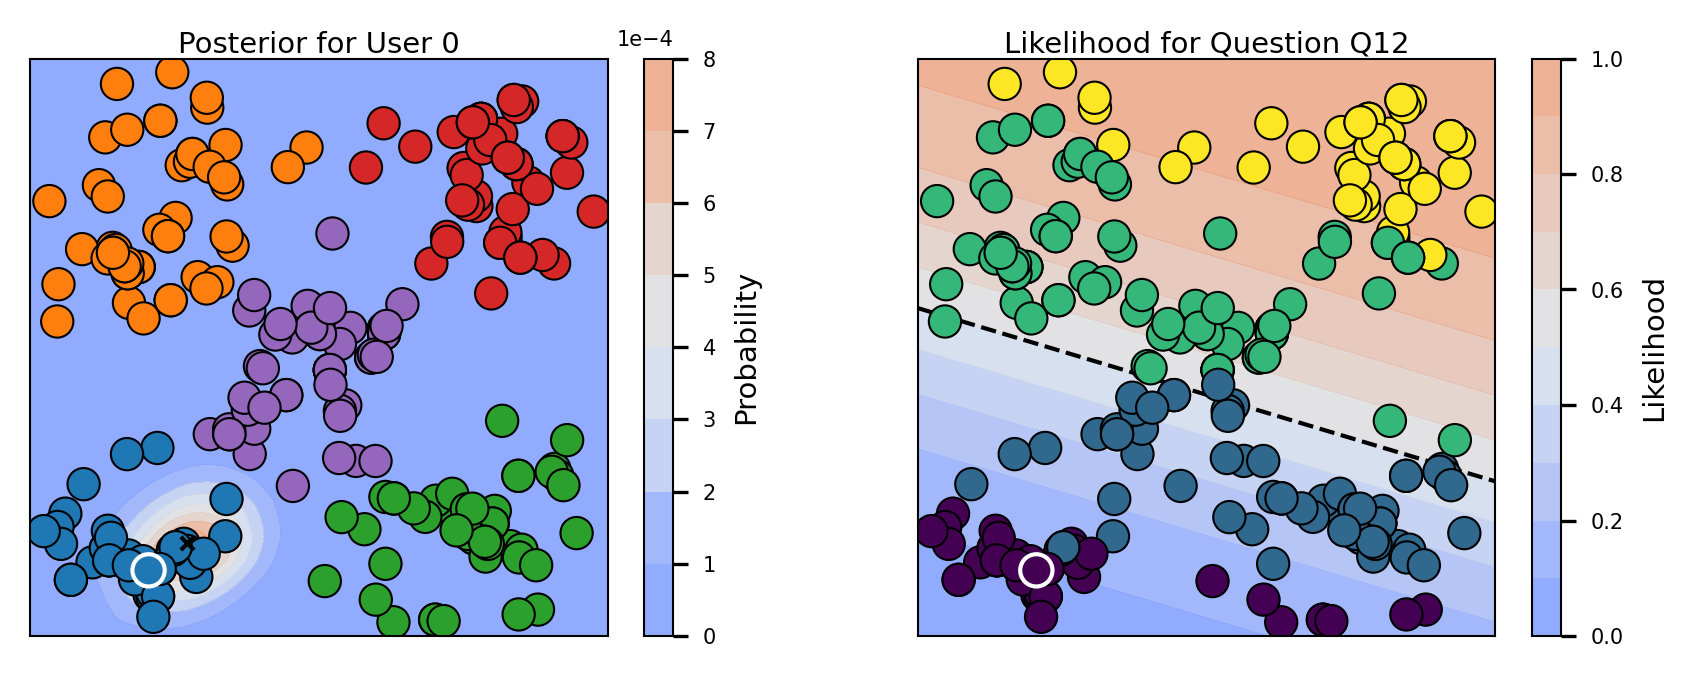

In [10]:
M = transformation_matrix(rotation=50, scale=(1.1, 1), order=('shear', 'rotate', 'scale'))
xplore.transform_embedding(M)
plot_overview(xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

### Initialize with transformation

We can then later initialize the model directly with this predefined transformation matrix.

2026-02-14 12:46:04,626 - ixplore - INFO - Number of users for model: 250
2026-02-14 12:46:04,627 - ixplore - INFO - Number of items: 40
2026-02-14 12:46:04,627 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 12:46:04,628 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 12:46:04,631 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 12:46:04,632 - ixplore - INFO - Random state set to 17
2026-02-14 12:46:04,632 - ixplore - INFO - Initialized embedding with random values.
2026-02-14 12:46:04,684 - ixplore - INFO - Fitted model parameters from embedding.
2026-02-14 12:46:04,685 - ixplore - INFO - Iteration 1/5
2026-02-14 12:46:05,945 - ixplore - INFO - Fit MAE: 0.0951, Fit accuracy: 0.9447
2026-02-14 12:46:05,946 - ixplore - INFO - Iteration 2/5
2026-02-14 12:46:07,267 - ixplore - INFO - Fit MAE: 0.0747, Fit accuracy: 0.9732
2026-02-14 12:46:07,268 - ixplore - INFO - Iteration 3/5
2026-02-14 12:4

(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

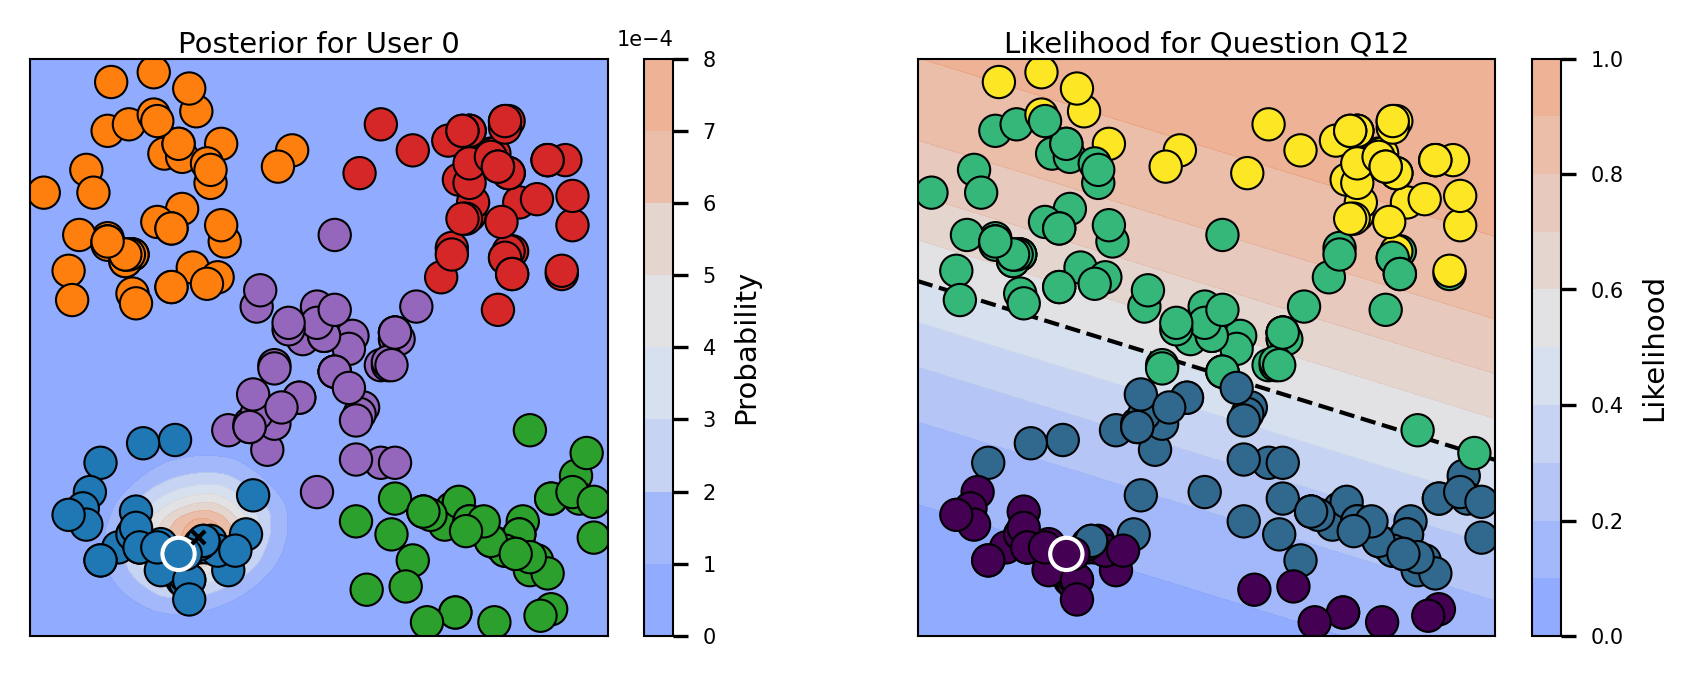

In [11]:
M = transformation_matrix(rotation=50, scale=(1.1, 1), order=('shear', 'rotate', 'scale'))

transformed_xplore = IXPLORE(reactions, pca_initialization=False, random_state=17, transformation=M)
transformed_xplore.iterate(n_iterations=5)
plot_overview(transformed_xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

### Initialize with PCA

We can directly initialize the embedding with PCA to speed up the convergence.

2026-02-14 12:46:11,477 - ixplore - INFO - Number of users for model: 250
2026-02-14 12:46:11,477 - ixplore - INFO - Number of items: 40
2026-02-14 12:46:11,477 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 12:46:11,478 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 12:46:11,482 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 12:46:11,482 - ixplore - INFO - Random state set to 17
2026-02-14 12:46:11,485 - ixplore - INFO - Initialized embedding with PCA.
2026-02-14 12:46:11,544 - ixplore - INFO - Fitted model parameters from embedding.
2026-02-14 12:46:11,588 - ixplore - INFO - MAE: 0.07300346705380255, ACC: 0.9769


(<Figure size 2100x750 with 4 Axes>,
 (<Axes: title={'center': 'Posterior for User 0'}>,
  <Axes: title={'center': 'Likelihood for Question Q12'}>))

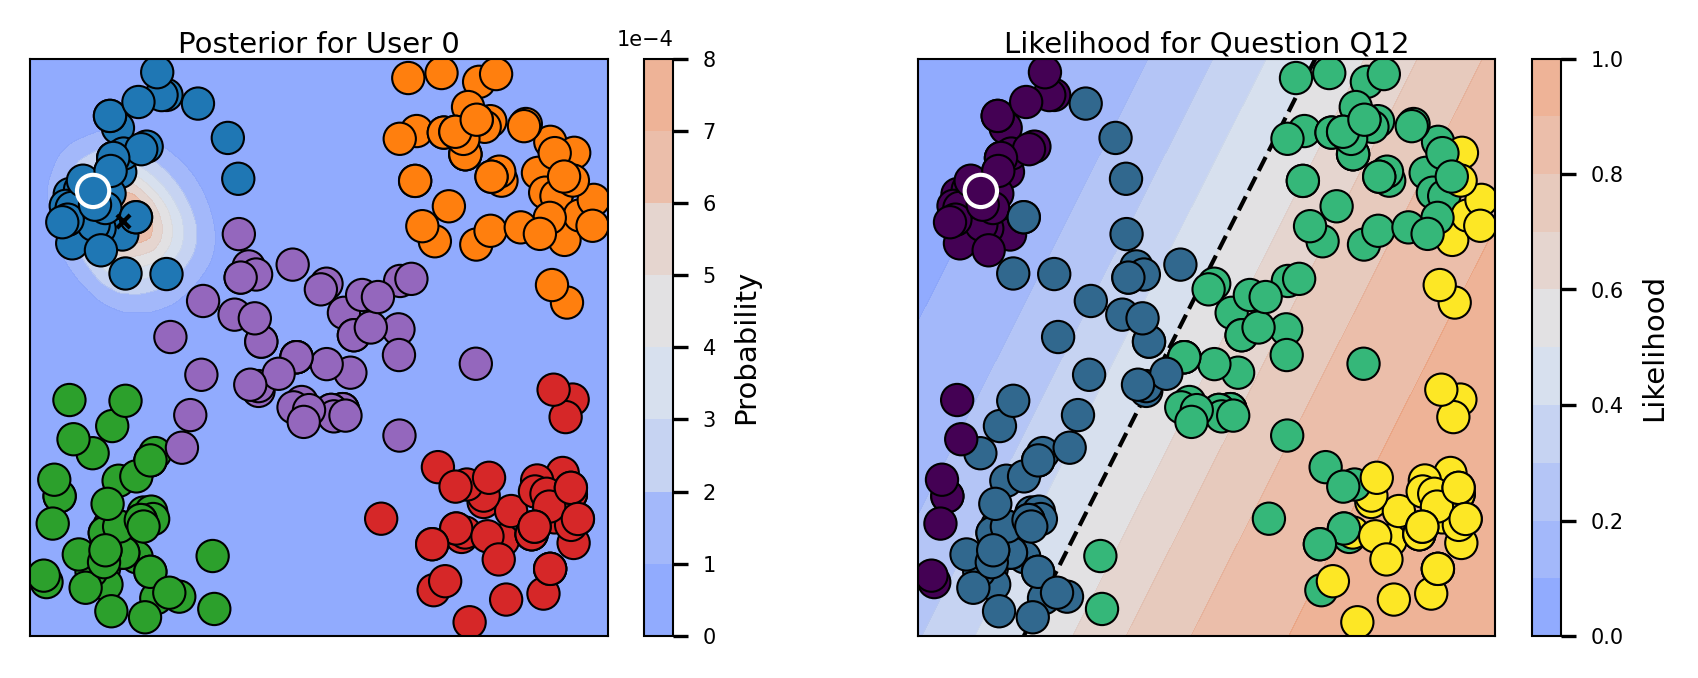

In [12]:
pca_xplore = IXPLORE(reactions, pca_initialization=True, random_state=17)
plot_overview(pca_xplore, question='Q12', user='0', colors=users.color, figsize=(7,2.5))

We can save the embedding coordinates and model parameters to load them directly later.

In [13]:
path = '../data/pretrained_embedding.csv'
pca_xplore.get_embedding().to_csv(path)

path = '../data/pretrained_models.csv'
pca_xplore.get_item_parameters().to_csv(path)

## Embed new users

First, we load a model with predefined parameters.

2026-02-14 12:46:11,759 - ixplore - INFO - Number of users for model: 250
2026-02-14 12:46:11,759 - ixplore - INFO - Number of items: 40
2026-02-14 12:46:11,760 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 12:46:11,761 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 12:46:11,764 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 12:46:11,765 - ixplore - INFO - Random state set to 0
2026-02-14 12:46:11,766 - ixplore - INFO - Pretrained embedding loaded from ../data/pretrained_embedding.csv
2026-02-14 12:46:11,767 - ixplore - INFO - Used pretrained embedding.
2026-02-14 12:46:11,827 - ixplore - INFO - Fitted model parameters from embedding.
2026-02-14 12:46:11,853 - ixplore - INFO - MAE: 0.07568546459561465, ACC: 0.9698


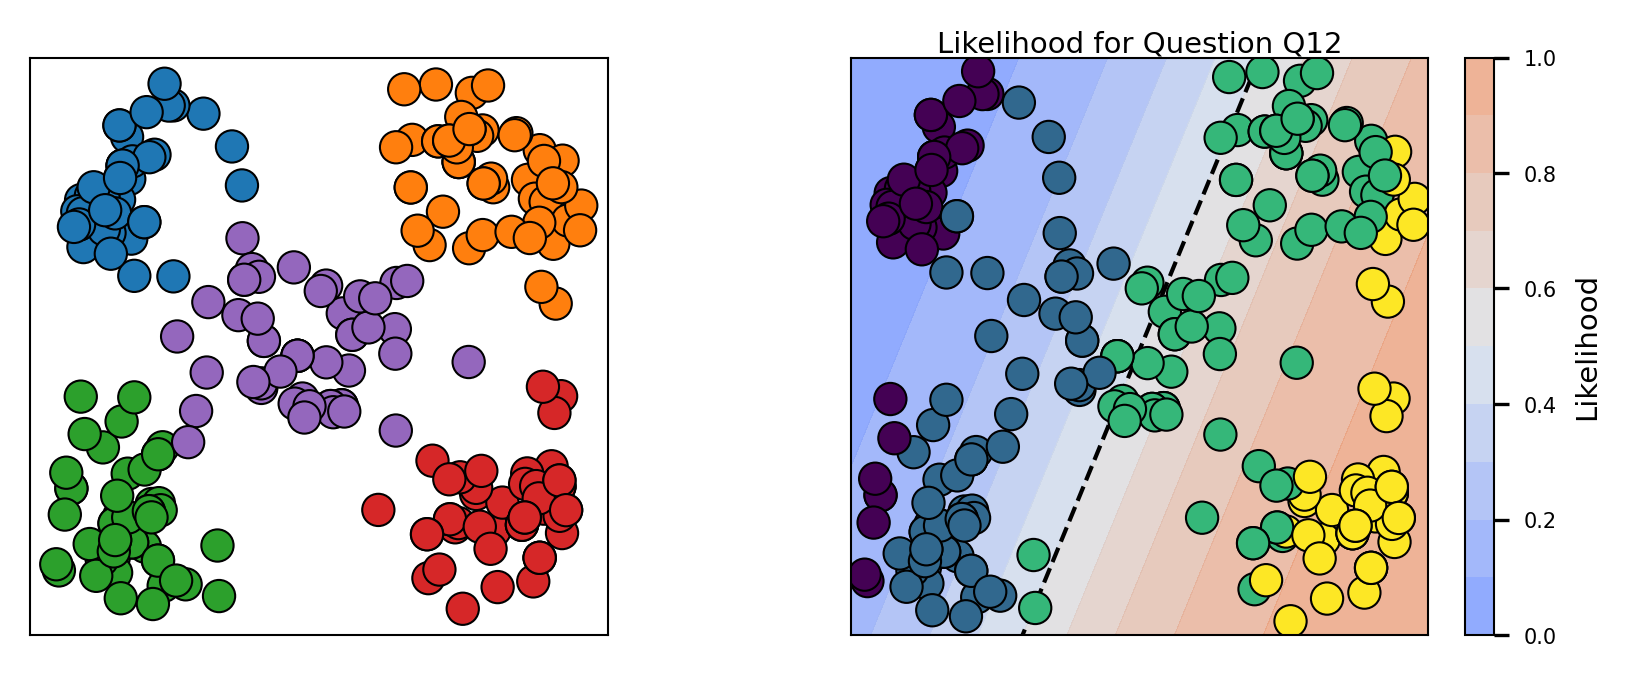

In [14]:
path = '../data/pretrained_embedding.csv'
loaded_xplore = IXPLORE(reactions, pretrained_embedding=path)
fig, (ax1, ax2) = plot_overview(loaded_xplore, question='Q12', user=None, colors=users.color, figsize=(7,2.5))

We can embed a new user that has only answered one question and see where they would be located in the embedding space. 

In [15]:
new_user = pd.Series({'Q12':1}, name='new_user')
new_user

Q12    1
Name: new_user, dtype: int64

Because the prior distribution is very strong, this one answer doesn't have a high impact on the position.

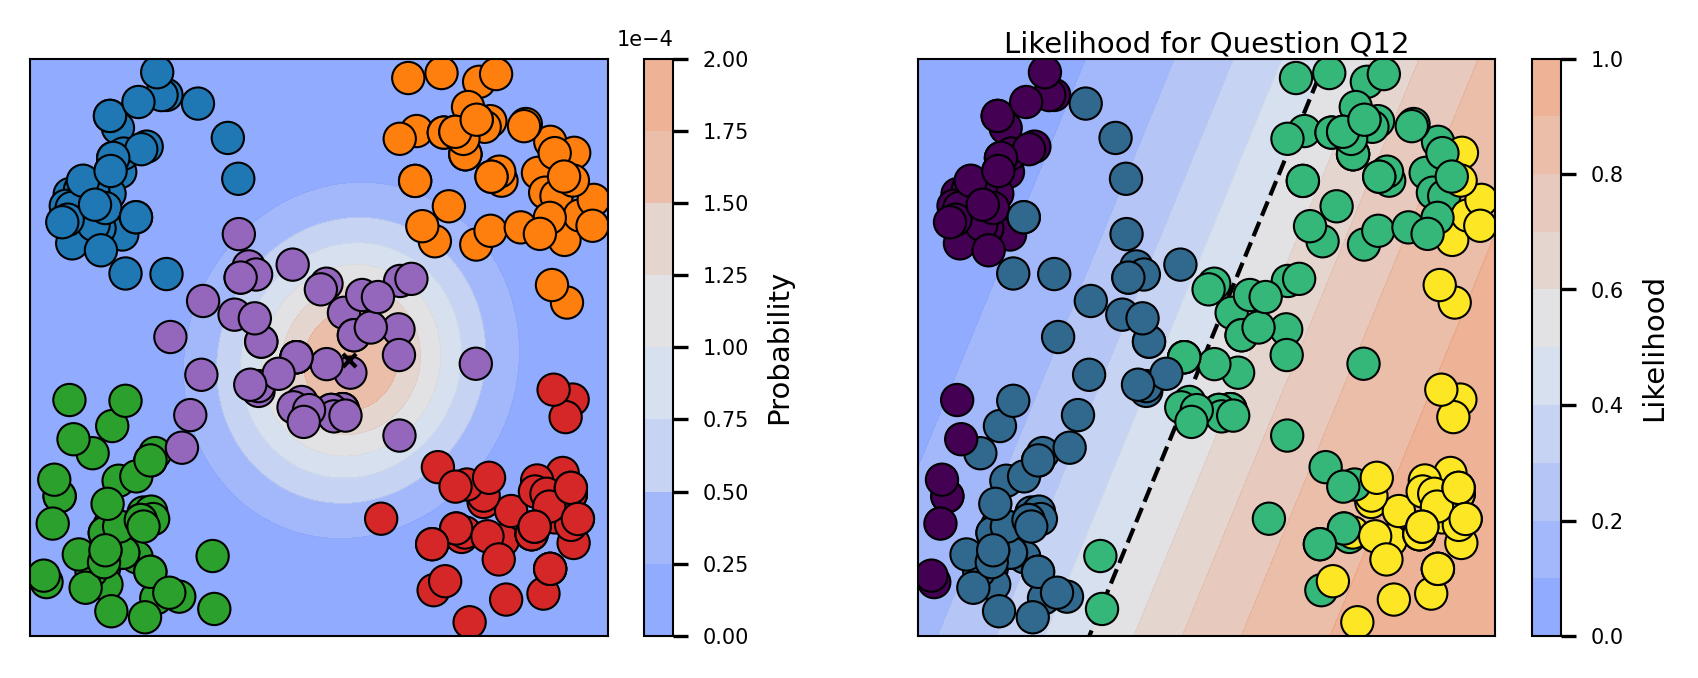

<Figure size 1500x1500 with 0 Axes>

In [16]:
plot_posterior(loaded_xplore, new_user, ax=ax1) 
display(fig)

 We can generate more answers. Let's say, we want to create a user that is at the very top left of the embedding space. We then predict answers for this position:

In [17]:
answers = loaded_xplore.predict(np.array([[-1,1]])).flatten().round()
new_user = pd.Series(answers, index=loaded_xplore.items, name='new_user')
new_user.head()

Q1    0.0
Q2    0.0
Q3    1.0
Q4    1.0
Q5    1.0
Name: new_user, dtype: float64

If we embed this user, we see that they end up in the area at the top left.

2026-02-14 12:46:12,144 - ixplore - INFO - MAE: 0.07568546459561465, ACC: 0.9698


(<Figure size 2100x750 with 4 Axes>, <Axes: >)

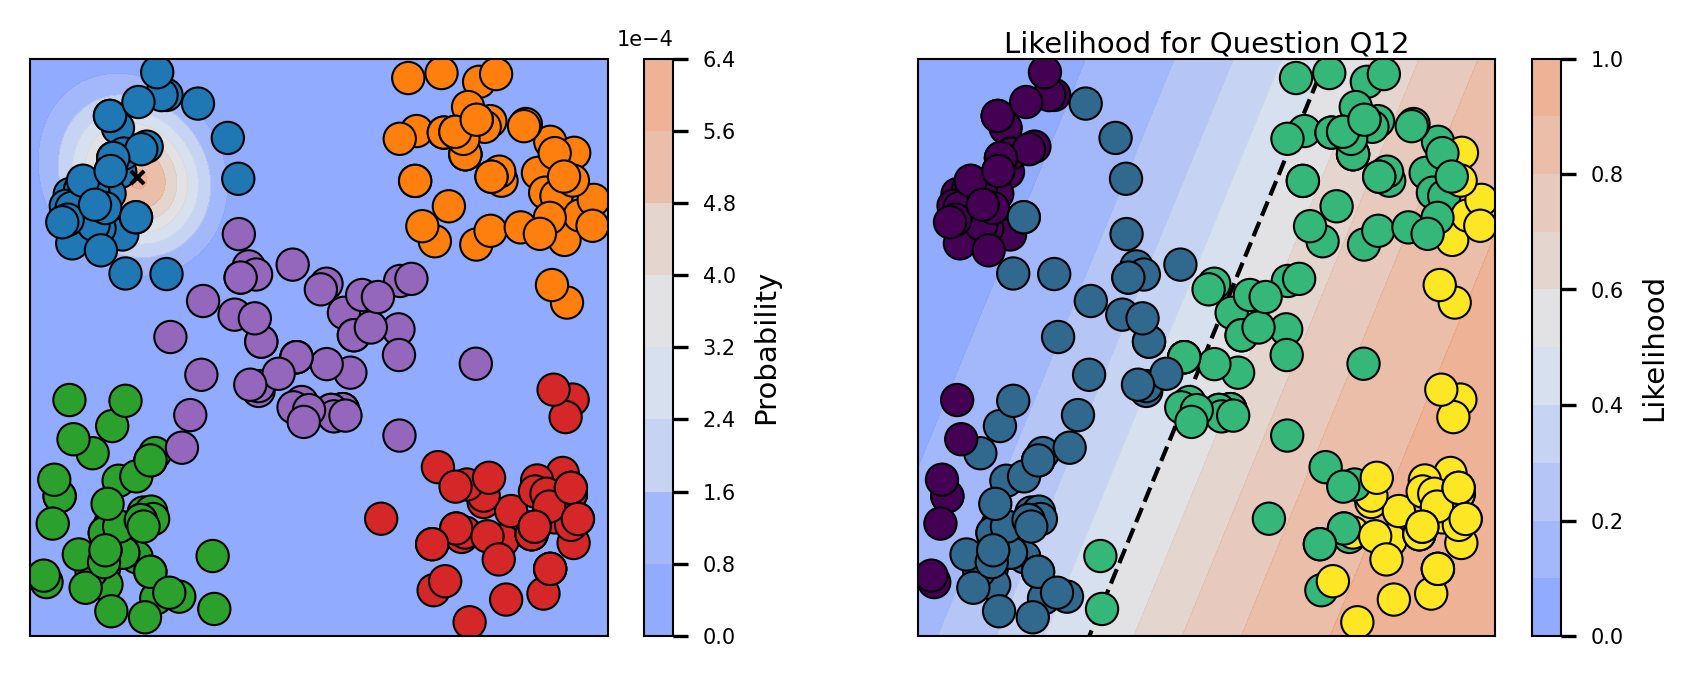

In [18]:
fig, (ax1, ax2) = plot_overview(loaded_xplore, question='Q12', user=None, colors=users.color, figsize=(7,2.5))
plot_posterior(loaded_xplore, new_user, ax=ax1) 

If we want them to be even further, we have to reduce the prior.

In [19]:
loaded_xplore.set_prior(prior_mean=np.zeros(2), prior_cov=np.eye(2)*0.5)

2026-02-14 12:46:12,354 - ixplore - INFO - MAE: 0.07568546459561465, ACC: 0.9698


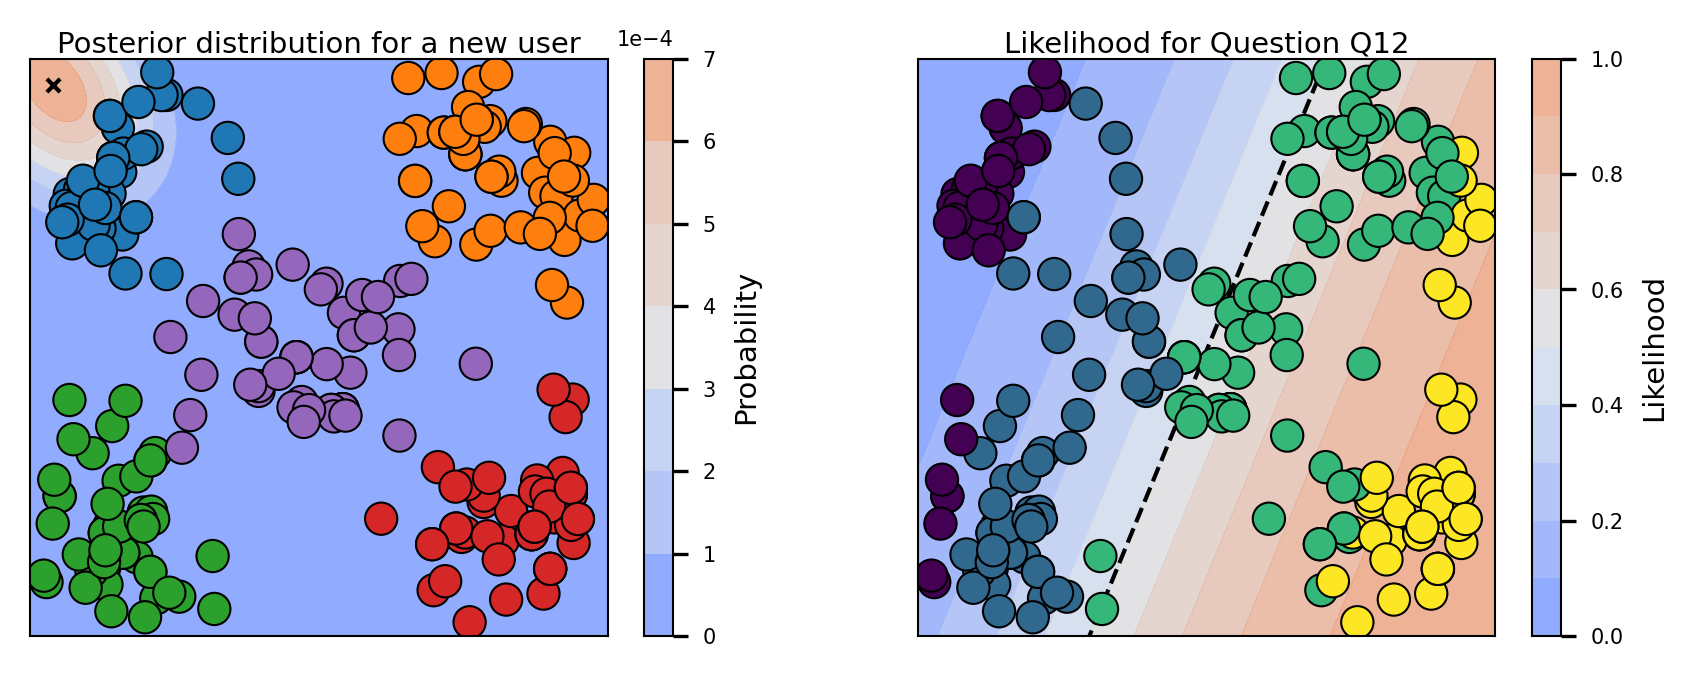

In [20]:
fig, (ax1, ax2) = plot_overview(loaded_xplore, question='Q12', user=None, colors=users.color, figsize=(7,2.5))
plot_posterior(loaded_xplore, new_user, ax=ax1) 
ax1.set_title("Posterior distribution for a new user")
fig.savefig("../docs/overview_new_user.png", dpi=300, bbox_inches="tight")